**Abstract and business objective**

The main objective revolved around the identification of key metrics which contributes the most towards predicting a shopper's behavior and to suggest prioritized critical recommendations and performance improvements on the same. Revenue is the attribute of interest which identifies if a purchase was made or not.



**Including Packages**

In [71]:
# for preprocessing/eda models
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# balancing
from imblearn.over_sampling import SMOTE

# accuracy metrics and data split models
from sklearn.model_selection import train_test_split
from sklearn import metrics, model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', 500) # display max 500 rows
pd.set_option('display.max_rows', 500)

print("Successfully imported all packages")

Successfully imported all packages


In [72]:
import sklearn; print("Scikit-Learn", sklearn.__version__)
import imblearn; print("Imbalanced-Learn", imblearn.__version__)

Scikit-Learn 0.24.2
Imbalanced-Learn 0.6.0


**Reading Data**

In [73]:
# reading the dataset


import io
data = pd.read_csv('D:\WIN 2020-21\Essentials of Data Analytics\customer_purchase_information.csv')
# Dataset is now stored in a Pandas Dataframe

**Data Preprocessing**

There are no missing values in the dataset. The structure of the attributes were altered according to categorical and numerical basis. For modelling the categorical attributes were converted to ordered factor variables and numerically encoded. The numerical variables of the dataset were normalized for clustering methods and scaled for classification methods. 80% of the data was used during the training session and our modelling was tested on the remaining 20% of the unseen data.

In [74]:
#take a look at the data head
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [75]:
data.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


we see that we are missing data of two months here

In [76]:
print('Nbr of months: ',len(data.Month.value_counts()))
data.Month.value_counts()

Nbr of months:  10


May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [77]:
#missing value analysis 

data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [78]:
#drop the null values
data.dropna(axis = 0, how = "any", inplace = True)

In [79]:
#check for null values again
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [80]:
#Descriptive Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


**Data Visulalisation**

<AxesSubplot:xlabel='Revenue', ylabel='count'>

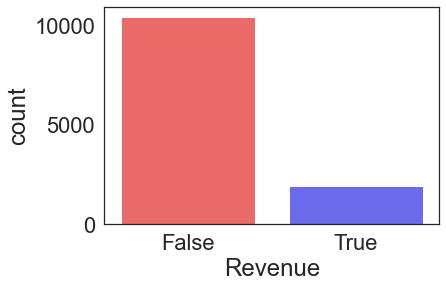

In [81]:
#Count of Revenue
sns.countplot(data.Revenue, palette = 'seismic_r')

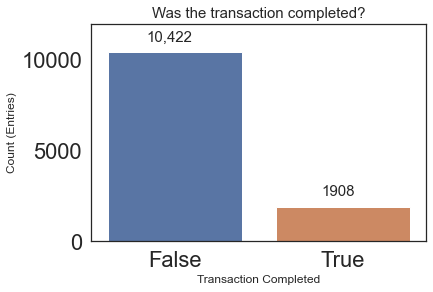

In [82]:
# Visualize the data

sns.countplot(data['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

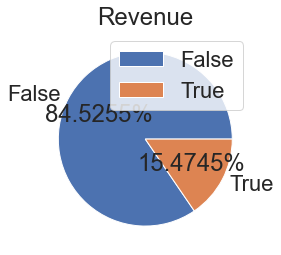

In [83]:
#pie chart for revenue
labels = ['False', 'True']
plt.title("Revenue")
plt.pie(data.Revenue.value_counts(), labels = labels, autopct = '%.4f%%')
plt.legend()

<AxesSubplot:xlabel='Region', ylabel='count'>

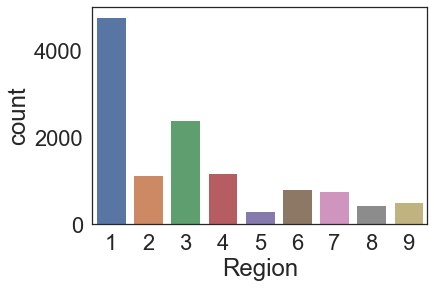

In [84]:
#different regions
sns.countplot(data.Region)

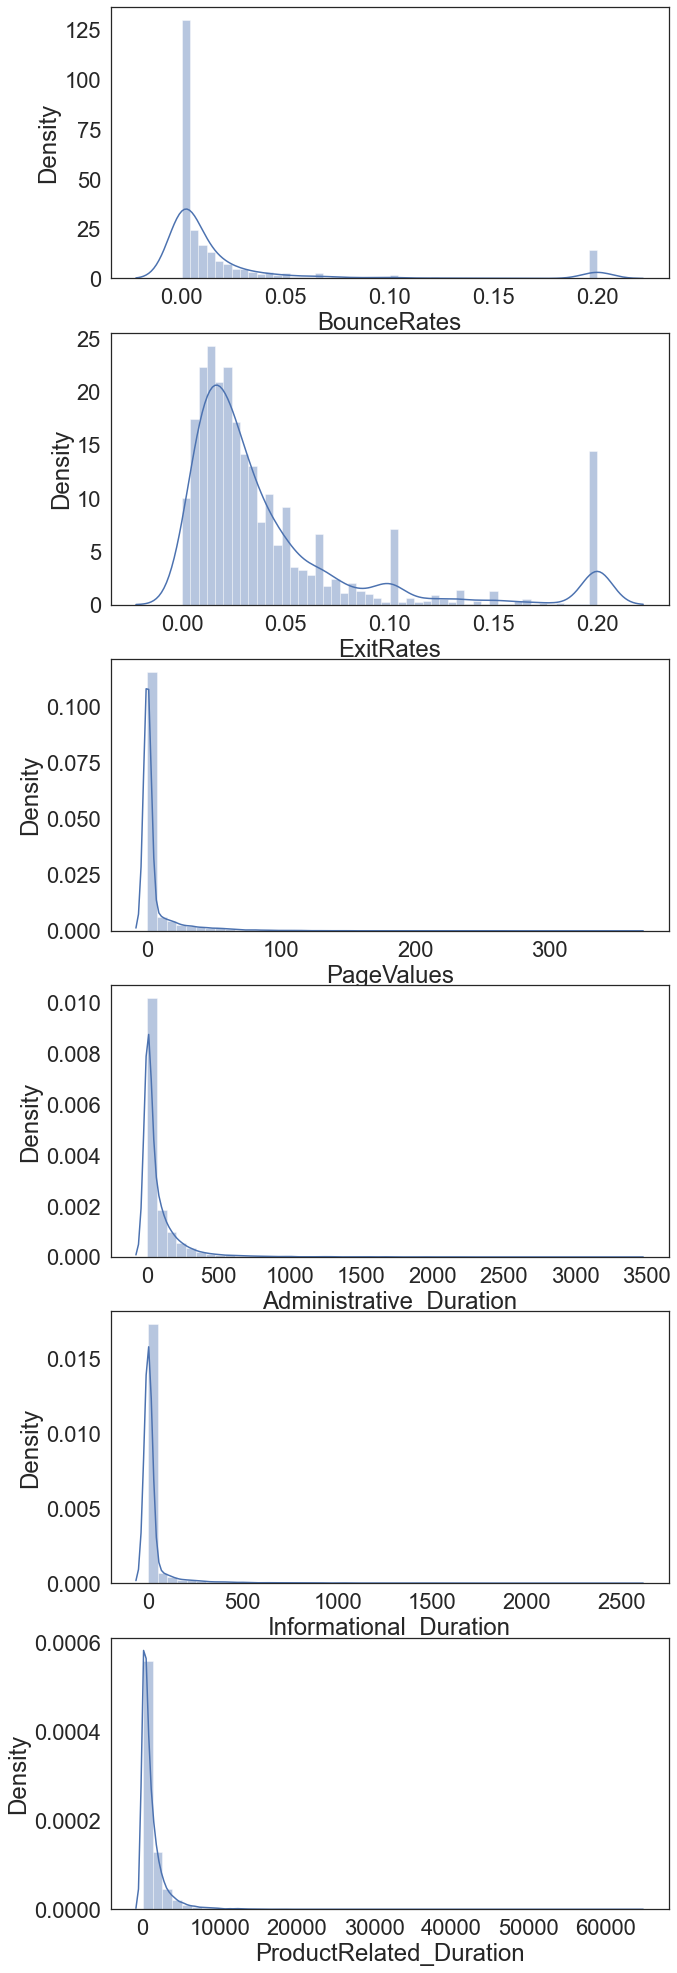

In [85]:
## Checking skewness of columns

# Plotting a histogram of columns for continous values  
col_names2 = ['BounceRates', 'ExitRates','PageValues', 'Administrative_Duration','Informational_Duration',
              'ProductRelated_Duration'] 

fig, ax = plt.subplots(len(col_names2), figsize=(10,35))

for i, col_val in enumerate(col_names2):

    sns.distplot(data[col_val], hist=True, ax=ax[i])

plt.show()

**Business Intelligence and Recommendations**

1.   Impact of bounce rate and exit rate

Bounce rate is the overall percentage of a single engagement session whereas exit rate is the percentage of exits from a page. Hence the former is calculated by dividing the aggregation of one-page visits to the overall entrance visits whereas latter is calculated by dividing the aggregation of total exits from a page to the total visits to a page. One major difference between these closely tied metrics is that exit rate is related to the overall percentage of visitors that were within the last session whereas bounce rates account for the percentage of visitors that were part of that one and only session. Hence in the case of bounce rate, prior activity is not considered. Hence all bounces logically define exits but conversely it is not true .

A high bounce rate could indicate issues with user satisfaction owing to one or many reasons such as unfriendly UI of the website, extremely slow throughput or other technical matters. A high exit rate could be a sign of lower performing sectors in funnels, showing areas open to optimization as if customers are leaving then at the end of the day no one is buying. According to BigCommerce . A bounce rate between 30% to 55% is acceptable. Our analysis shows the bounce rates largely scattered lower than 10%. Hence more investigation is needed on these data. Given that there is indeed no error we could look for ways to optimize bounce rates and exit rates to ensure saving sales and securing customer loyalty.

Most of the numerical attributes seem to exhibit high positive skewness whereas some exhibit nominal tinge of negative skewness.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Administrative'),
  Text(1.5, 0, 'Administrative_Duration'),
  Text(2.5, 0, 'Informational'),
  Text(3.5, 0, 'Informational_Duration'),
  Text(4.5, 0, 'ProductRelated'),
  Text(5.5, 0, 'ProductRelated_Duration'),
  Text(6.5, 0, 'BounceRates'),
  Text(7.5, 0, 'ExitRates'),
  Text(8.5, 0, 'PageValues'),
  Text(9.5, 0, 'Revenue')])

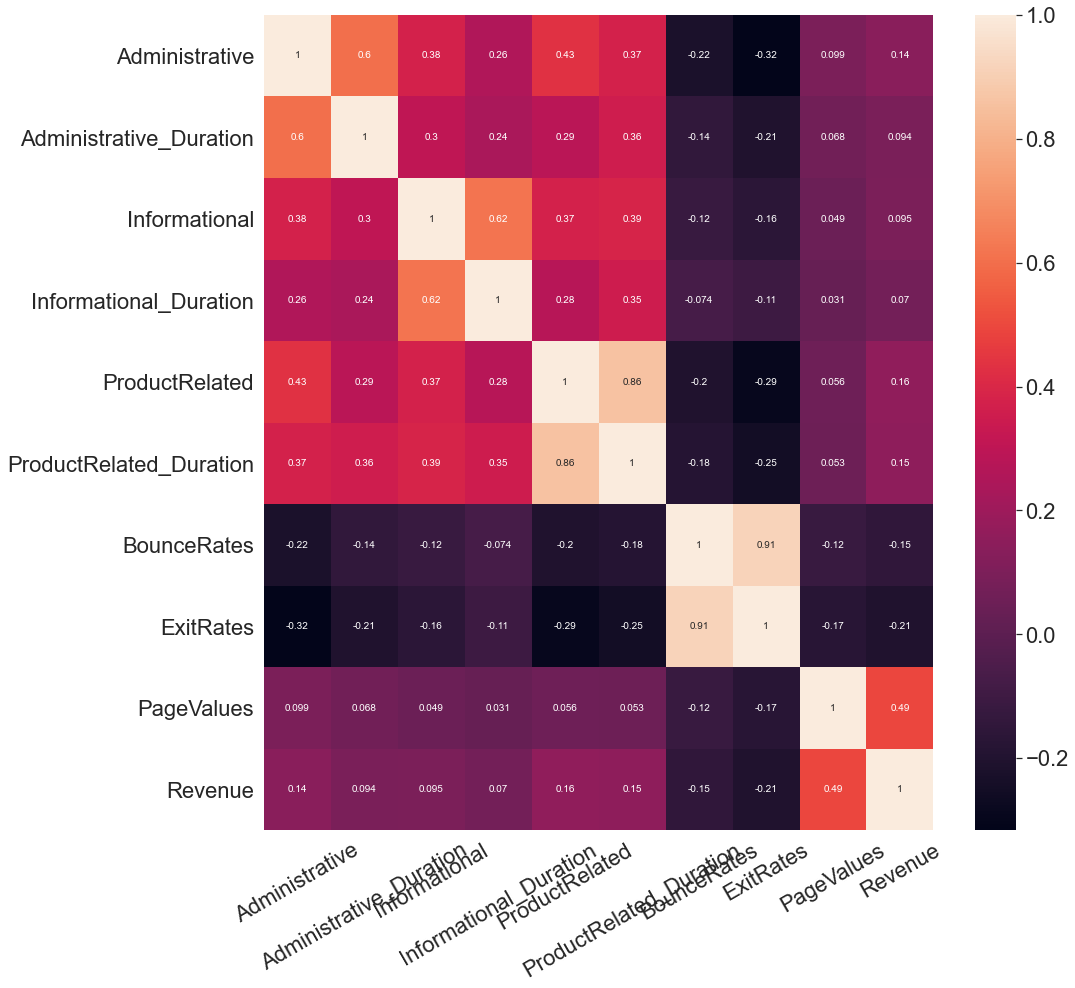

In [86]:
#Correlation Matrix

dataset_interval = data[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Revenue']]
correlation_matrix = dataset_interval.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlation_matrix, annot =True, annot_kws = {'size': 10})
plt.xticks(rotation = 30)

Bounce Rate and Exit Rate are highly correlated.

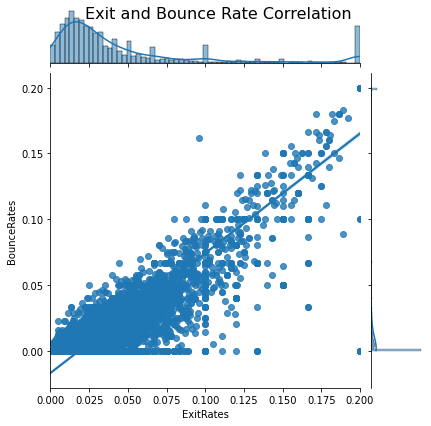

In [17]:
#Relationship between Exit Rates and Bounce Rates 
sns.jointplot(data = data, x= 'ExitRates', y = 'BounceRates', kind = 'reg')
plt.suptitle('Exit and Bounce Rate Correlation', fontsize = 16)
plt.show()

**Recommendation 1:** Optimization of the landing product pages by means such as making the add to cart option stand out, UI friendly, short descriptions and icons wherever needed, color impactfulness and ensuring that the purchase experience is as smooth as possible. Another important aspect is to ensure not to create an illusion of low price until put in the cart, i.e. the shipping fees could create a significant impact over exit rates. Hence it is always better to exhibit the true cost right from the start.

**Recommendation 2:** Categorizing email retargeting based on funneling as mentioned with the previous dataset, so that there exists a personalized touch to the mail. Personalization brings in large scale loyalty and in turn better retention.

**Recommendation 3:** Introducing pop-ups offering qualitative discounts or personalized queries when a customer bounces multiple times and/or tries to leave the website.

**Impact of loyal customers and "weekend syndrome"**

The following figure depicts that most of the customers whether they drive in revenue or not, are returning customers, suggesting that the firm has dealt with good retention with customers. However, the need to work on conversion rates is apparent. This is a common tendency in many firms to focus on conversion or retention and not balance out on both. While retention speaks of brand value, without new customers driving in this could significantly impact sales and revenue growth. Most of the visitors came in and made a purchase during the weekday. We could exploit this further by trying to bring in more customers viewing and purchasing on the weekends.

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

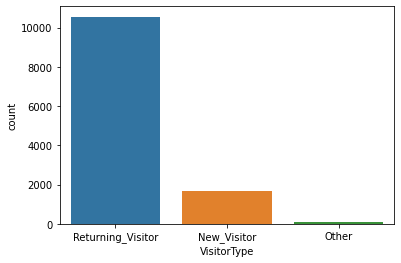

In [18]:
#different users
sns.countplot(x = data.VisitorType)

<AxesSubplot:xlabel='Weekend', ylabel='count'>

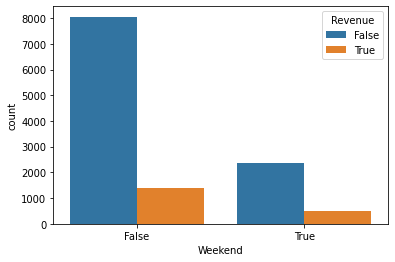

In [19]:
#Revenue with respect to Weekend
sns.countplot(data.Weekend, hue = data.Revenue)

**Recommendation 4:** Engage loyal customers in conversion of other customers by offering discounts for friends joining in. For new customers making a purchase in this manner, offer discounts as well.

**Recommendation 5:** Introduce time based or weekend based marketing campaign and/or promotional events to engage customers more on the weekends

**Impact of lower conversion during holidays**

The following figure depicts the seasonality revenue growth. There seems to be a high customer engagement during the months of Feb, Mar and May, post which the trend seems to be decreasing. Moreover, between the months of June to Oct the trend seems to stagnate post which there seems to be high engagement as Black Friday approaches. When the demand appears high, there appears to be a lot of engagement but significantly lower conversion rates as most of these purchases are driven by returning customers (plot on the right). While this suggests the presence of a good loyalty program, more attention is needed in conversion as the plots above suggests that a lot of customers are viewing your products but not taking a step further to make a purchase.

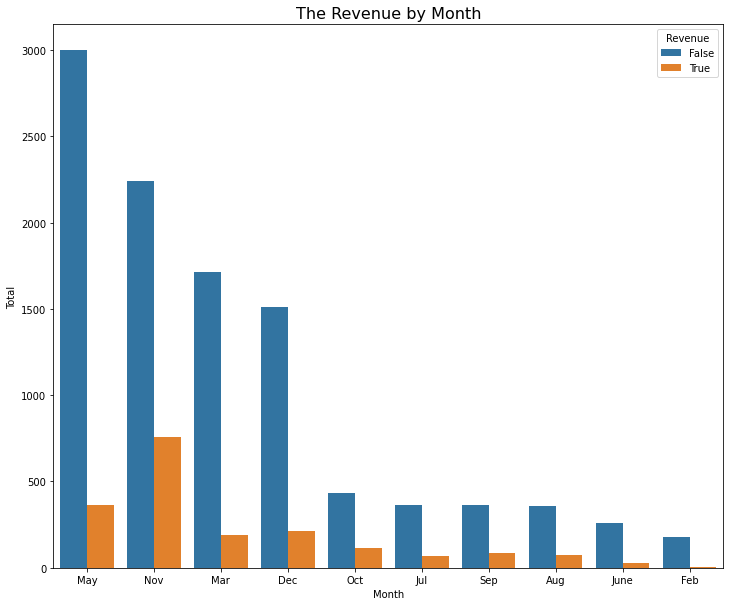

In [20]:
sums_revenue = pd.DataFrame(data.groupby(['Month', 'Revenue'])['Revenue'].count().rename('Total')).sort_values(by = ['Total'], ascending = False)
sums_revenue.reset_index(inplace = True)
fig, ax = plt.subplots(figsize = (12,10))
sns.barplot(x = sums_revenue.Month, y = sums_revenue.Total, hue = sums_revenue.Revenue)
plt.title('The Revenue by Month', fontsize = 16 )
plt.show()

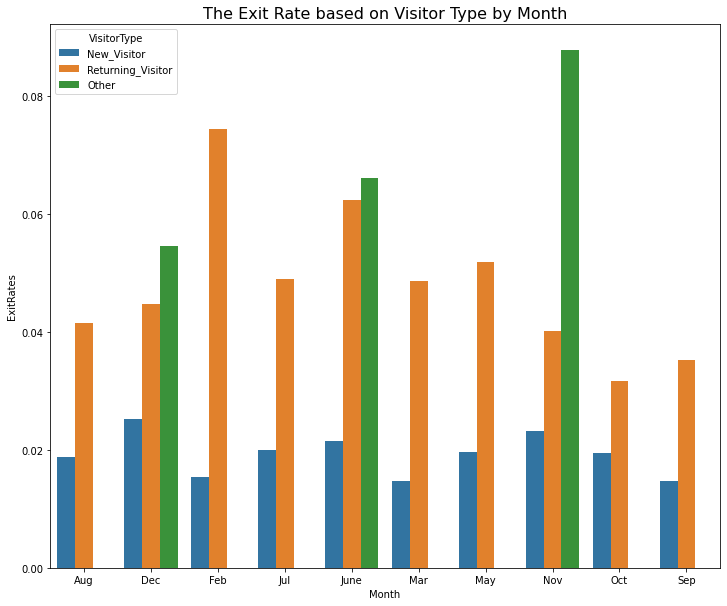

In [21]:
pivot2 = data.pivot_table(index = ['Month','VisitorType'], values = ['BounceRates','ExitRates'] , aggfunc = np.mean)
pivot2.reset_index(inplace = True)
        # Bar plot
fig, ax = plt.subplots(figsize = (12,10))
sns.barplot(x = pivot2['Month'], y = pivot2['ExitRates'], hue = pivot2['VisitorType'])
plt.title('The Exit Rate based on Visitor Type by Month', fontsize = 16)
plt.show()

**Recommendation 6:** Introduction of seasonal promotions with attractive offers and events, engaging more conversions and ensuring loyal customers have a beneficial part in bringing in new conversions.

**Impact of other revenue drivers**

From the following figure, we can capture the relationship between revenue growth and the operating system, browser region and traffic type sources. With respect to OS, the top performer remained “2” in both cases i.e, visitors and visitors who made a purchase. However, following positions were conversely secured by “1” and “3”. Other sources brought in considerably lower customers. This could either mean that the website is not user friendly on those sources or simply because those sources are niche, not many customers use them. With respect to browsers, “2” remains at the top followed by “1” , “4” and “5” in both cases. This could suggest the same reasonings as OS. With respect to region, “1” seems to be performing significantly better followed by “3” in both cases. The lead of “1” is highly significant suggesting that marketing reach within this region is well versed with. There is room for improvement within other regions. With respect to traffic type, “2” remains in the lead followed by “1” and “3”, suggesting the impact of Google SEO optimization. However, only 45% of these were revenue driven, |suggesting room for improvement with SEO and/or Google / Social media Ads.

<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

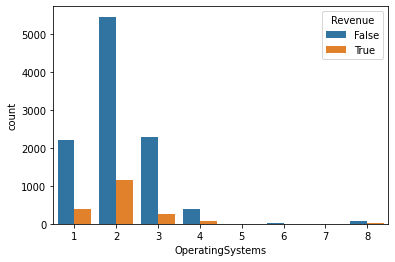

In [22]:
#Operating system wrt Revenue
sns.countplot(data.OperatingSystems, hue = data.Revenue)

<AxesSubplot:xlabel='Browser', ylabel='count'>

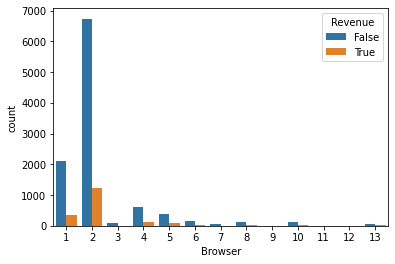

In [23]:
#Browser wrt Revenue
sns.countplot(data.Browser, hue = data.Revenue)

<AxesSubplot:xlabel='Region', ylabel='count'>

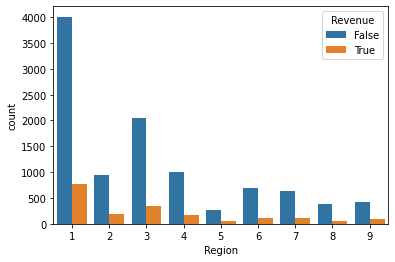

In [24]:
#Region wrt Revenue
sns.countplot(data.Region, hue = data.Revenue)

<AxesSubplot:xlabel='TrafficType', ylabel='count'>

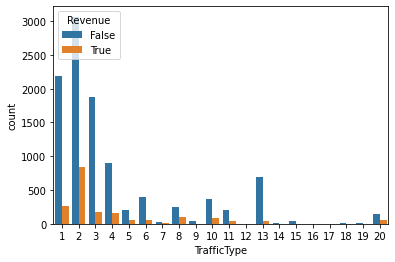

In [25]:
#Traffic type wrt Revenue
sns.countplot(data.TrafficType, hue = data.Revenue)

**Recommendation 7:** Ensuring smooth technical operations with enhanced and personalized UI experience supported by all browsers and OS.

**Recommendation 8:** Adapting similar model based approach as Region 1 over other regions by customizing the same according to social and cultural drivers. Personalizing ads and reach by A/B testing to ensure the reach and conversion / retention shows significant growth among all regions.

**Recommendation 9:** Ensuring optimization of SEO from different sources such as Google, Bing, Baidu etc. Working with region and age specific A/B testing within Google Ads, Facebook Ads or other sources.



<AxesSubplot:>

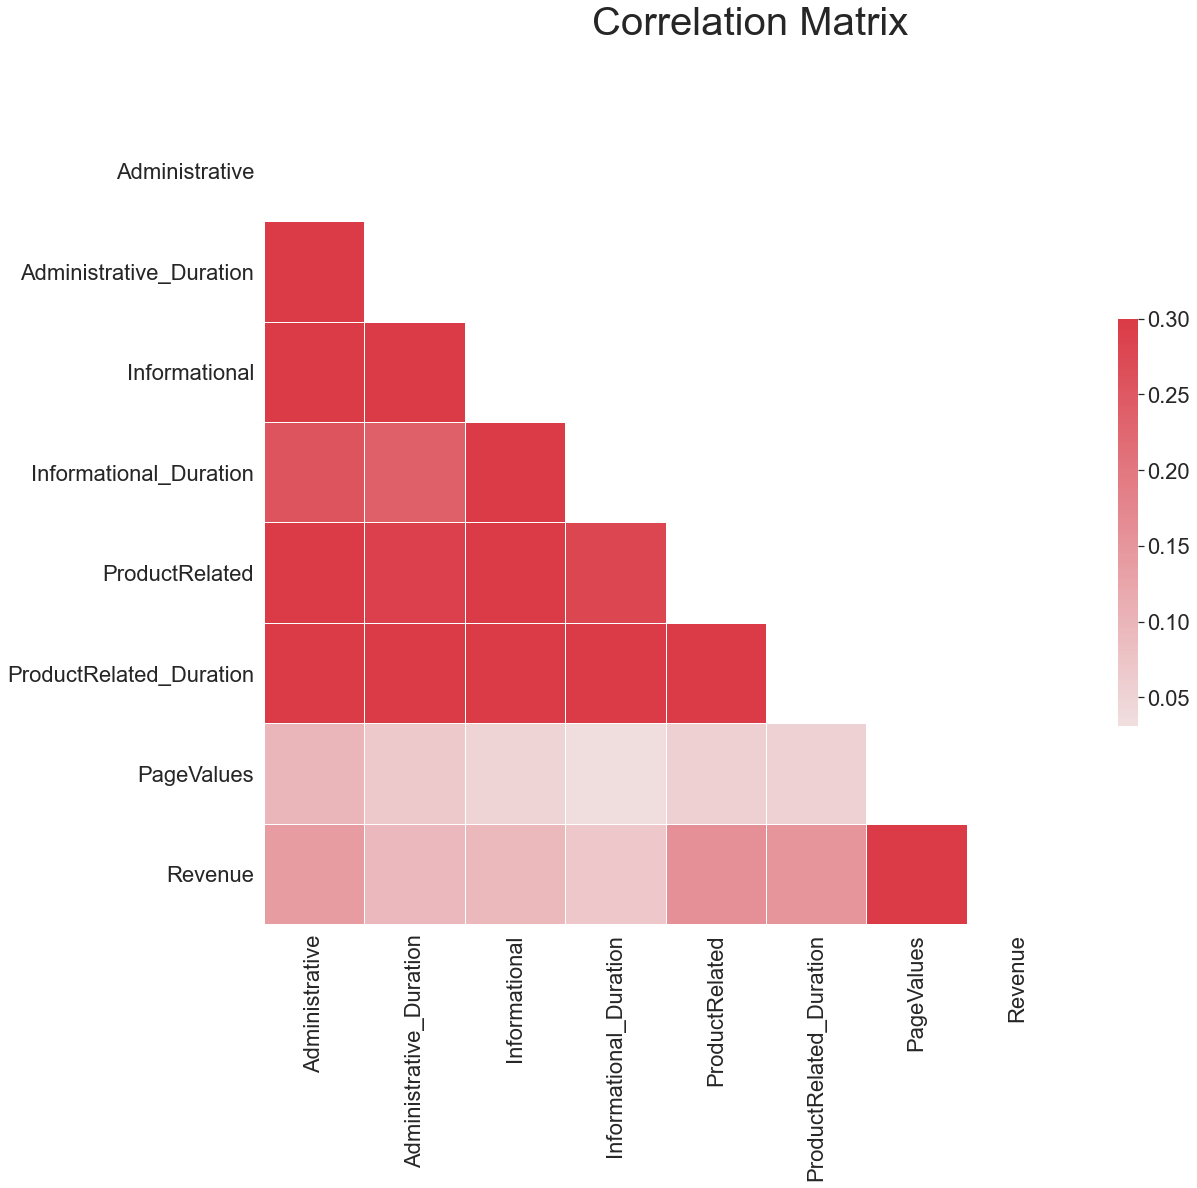

In [87]:
#Check null values

data.isnull().sum().sum()

#Drop unnecessary feature

data = data.drop(['BounceRates', 'ExitRates', 'SpecialDay',  'OperatingSystems', 'Browser', 'VisitorType', 'Month', 'Region', 'TrafficType', 'Weekend'], axis = 1)


## Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Data encoding for further analysis**

In [88]:
## Encode month and visitor type into integers

# this function takes the month object type and converts it to integer respectivelely 
def division_func_month(div) :
    if div == 'Feb':
        return 2
    elif div == 'Mar':
        return 3
    elif div == 'May':
        return 5
    elif div == 'June':
        return 6
    elif div == 'Jul':
        return 7
    elif div == 'Aug':
        return 8
    elif div == 'Sep':
        return 9
    elif div == 'Oct':
        return 10
    elif div == 'Nov':
        return 11
    elif div == 'Dec':
        return 12
    else:
        return 0

**Segmenting data in order to create models to analyse customer shopping patterns**

In [89]:
## Preparing data for model fitting

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Revenue'] = le.fit_transform(data['Revenue'])

fraud_indices = np.array(data[data.Revenue == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

1908


In [90]:
normal_indices = data[data.Revenue == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

1908


In [91]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Revenue']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Revenue']

3816


In [92]:
## building train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.2)

In [93]:
X_train.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
PageValues                 float64
dtype: object

In [94]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
print(X_train)

[[-0.77682031 -0.52291569 -0.43426229 ... -0.6274137  -0.55603942
  -0.51417779]
 [ 1.8205869   0.80669204 -0.43426229 ...  3.96576939  2.05271834
   0.21007769]
 [ 0.9547845  -0.02543577 -0.43426229 ... -0.66667168 -0.69301119
  -0.51417779]
 ...
 [-0.19961871 -0.34043152 -0.43426229 ... -0.68630067 -0.70326146
  -0.51417779]
 [-0.77682031 -0.52291569 -0.43426229 ... -0.13668901  0.66777521
   1.33572589]
 [-0.77682031 -0.52291569 -0.43426229 ... -0.60778472 -0.60088436
  -0.51417779]]


In [96]:
print(y_train)

       Revenue
5010         0
6467         1
6815         0
2392         1
8164         1
...        ...
2365         0
11075        0
11271        0
11203        1
10573        0

[3052 rows x 1 columns]


In [97]:
X_train.shape

(3052, 7)

In [98]:
X_test.shape

(764, 7)

**Model Fitting With Accuracy Metrics**

**1-XGBoost Classifier**

In [99]:
## 1 XGB Classifier

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
## its accuracy

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
acc1=accuracy_score(y_test, y_pred)
print("Accuracy of XGBoost was found to be -> ",acc1*100,"%")


Accuracy of XGBoost was found to be ->  83.24607329842932 %


In [101]:
# calculate confusion matrix
confusion_matrix_y = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for XGBoost Classfier:')
print(confusion_matrix_y)

print('Classification Report for XGBoostClassfier:')
print(classification_report(y_test, y_pred))

Confusion Matrix for XGBoost Classfier:
[[321  61]
 [ 67 315]]
Classification Report for XGBoostClassfier:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       382
           1       0.84      0.82      0.83       382

    accuracy                           0.83       764
   macro avg       0.83      0.83      0.83       764
weighted avg       0.83      0.83      0.83       764



**2- Random Forest**

In [102]:
##2 random forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
## its accuracy

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
acc2=accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest was found to be -> ",acc2*100,"%")

Accuracy of Random Forest was found to be ->  83.24607329842932 %


In [104]:
# calculate confusion matrix
confusion_matrix_y = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Random Forest Classfier:')
print(confusion_matrix_y)

print('Classification Report for Random Forest Classfier:')
print(classification_report(y_test, y_pred))

Confusion Matrix for Random Forest Classfier:
[[322  60]
 [ 68 314]]
Classification Report for Random Forest Classfier:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       382
           1       0.84      0.82      0.83       382

    accuracy                           0.83       764
   macro avg       0.83      0.83      0.83       764
weighted avg       0.83      0.83      0.83       764



**3-  Decision Tree Classifier**

In [105]:
##3 decision tree classifier

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
#its accuracy

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
acc3=accuracy_score(y_test, y_pred)
print("Accuracy of decision tree was found to be -> ",acc3*100,"%")

Accuracy of decision tree was found to be ->  76.70157068062828 %


In [107]:
# calculate confusion matrix
confusion_matrix_y = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Decision Tree Classfier:')
print(confusion_matrix_y)

print('Classification Report for Decision Tree Classfier:')
print(classification_report(y_test, y_pred))

Confusion Matrix for Decision Tree Classfier:
[[290  92]
 [ 86 296]]
Classification Report for Decision Tree Classfier:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       382
           1       0.76      0.77      0.77       382

    accuracy                           0.77       764
   macro avg       0.77      0.77      0.77       764
weighted avg       0.77      0.77      0.77       764



**4- Gaussian Naive Bayes**

In [108]:
##4 Gaussian NB

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [109]:
## its accuracy

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
acc4=accuracy_score(y_test, y_pred)
print("Accuracy of Gaussian Naive Baise was found to be - ",acc4*100,"%")

Accuracy of Gaussian Naive Baise was found to be -  72.12041884816755 %


In [110]:
# calculate confusion matrix
confusion_matrix_y = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for GaussianNB Classfier:')
print(confusion_matrix_y)

print('Classification Report for GaussianNB Classfier:')
print(classification_report(y_test, y_pred))

Confusion Matrix for GaussianNB Classfier:
[[329  53]
 [160 222]]
Classification Report for GaussianNB Classfier:
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       382
           1       0.81      0.58      0.68       382

    accuracy                           0.72       764
   macro avg       0.74      0.72      0.72       764
weighted avg       0.74      0.72      0.72       764



**5- Support Vector Classifier**

In [111]:
##5 support vector classifier

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [112]:
## its accuracy

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc5=accuracy_score(y_test, y_pred)
print("Accuracy of support vector classifier was found to be -> ",acc5*100,"%")

[[318  64]
 [ 84 298]]
Accuracy of support vector classifier was found to be ->  80.6282722513089 %


In [113]:
# calculate confusion matrix
confusion_matrix_y = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Support Vector Classfier:')
print(confusion_matrix_y)

print('Classification Report for Support Vector Classfier:')
print(classification_report(y_test, y_pred))

Confusion Matrix for Support Vector Classfier:
[[318  64]
 [ 84 298]]
Classification Report for Support Vector Classfier:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       382
           1       0.82      0.78      0.80       382

    accuracy                           0.81       764
   macro avg       0.81      0.81      0.81       764
weighted avg       0.81      0.81      0.81       764



**6- KNN Classifier**

In [114]:
##6 KNeighbours classifier

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [116]:
## its accuracy

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
acc6=accuracy_score(y_test, y_pred)
print("Accuracy of KNN Classifier was found to be -> ",acc6*100,"%")

Accuracy of KNN Classifier was found to be ->  79.18848167539268 %


In [117]:
# calculate confusion matrix
confusion_matrix_y = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for K means:')
print(confusion_matrix_y)

print('Classification Report for K means:')
print(classification_report(y_test, y_pred))


Confusion Matrix for K means:
[[305  77]
 [ 82 300]]
Classification Report for K means:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       382
           1       0.80      0.79      0.79       382

    accuracy                           0.79       764
   macro avg       0.79      0.79      0.79       764
weighted avg       0.79      0.79      0.79       764



**7. Logistic Regression**

In [118]:
##7 Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [119]:
## its accuracy

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
acc7=accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression was found to be -> ",acc7*100,"%")

Accuracy of Logistic Regression was found to be ->  81.54450261780106 %


In [120]:
# calculate confusion matrix
confusion_matrix_y = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y)

print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y_test, y_pred))

Confusion Matrix for Logistic Regression Classfier:
[[334  48]
 [ 93 289]]
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       382
           1       0.86      0.76      0.80       382

    accuracy                           0.82       764
   macro avg       0.82      0.82      0.81       764
weighted avg       0.82      0.82      0.81       764



**8. Ridge Classifier**

In [121]:
#8 Ridge Classifier

from sklearn.linear_model import RidgeClassifier

classifier = RidgeClassifier()
print(classifier)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=None, solver='auto',
                tol=0.001)

classifier.fit(X_train, y_train)


RidgeClassifier()


RidgeClassifier()

In [122]:
## its accuracy

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
acc8=accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression was found to be -> ",acc8*100,"%")

Accuracy of Logistic Regression was found to be ->  76.30890052356021 %


In [123]:
# calculate confusion matrix
confusion_matrix_y = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Ridge Regression Classfier:')
print(confusion_matrix_y)

print('Classification Report for Ridge Regression Classfier:')
print(classification_report(y_test, y_pred))

Confusion Matrix for Ridge Regression Classfier:
[[329  53]
 [128 254]]
Classification Report for Ridge Regression Classfier:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       382
           1       0.83      0.66      0.74       382

    accuracy                           0.76       764
   macro avg       0.77      0.76      0.76       764
weighted avg       0.77      0.76      0.76       764



Our task for future is to analyze all the accuracy metrics for all these models.

We will try to take significant variables for the model building to optimize the model to further improve its accuracy.


**Implementation of Auto ML technique using TPOT** -
The goal of TPOT is to automate the building of ML pipelines by combining a flexible expression tree representation of pipelines with stochastic search algorithms such as genetic programming. TPOT makes use of the Python-based scikit-learn library as its ML menu.

In [124]:
## tpot
# reading the dataset


import io
datatpot = pd.read_csv('D:\WIN 2020-21\Essentials of Data Analytics\customer_purchase_information.csv')
# Dataset is now stored in a Pandas Dataframe

In [125]:
#(TPOT) Tree-based Pipeline Optimization Tool, or TPOT for short, is a Python library for automated machine learning. 
#TPOT uses a tree-based structure to represent a model pipeline for a predictive modeling problem, 
#including data preparation and modeling algorithms and model hyperparameters.


# random data shuffle
data_shuffle=datatpot.iloc[np.random.permutation(len(data))]
data1 = data_shuffle.reset_index(drop=True)
data1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,18.25,0,0.0,82,2796.316667,0.005185,0.019585,0.0,0.0,Nov,2,2,1,6,Returning_Visitor,False,False
1,5,85.25,0,0.0,3,36.250000,0.000000,0.009524,0.0,0.0,Nov,2,4,4,2,Returning_Visitor,False,False
2,0,0.00,0,0.0,2,0.000000,0.200000,0.200000,0.0,0.0,May,1,8,2,1,Returning_Visitor,False,False
3,0,0.00,0,0.0,5,97.166667,0.000000,0.033333,0.0,0.0,May,1,1,3,3,Returning_Visitor,False,False
4,0,0.00,0,0.0,7,38.000000,0.142857,0.171429,0.0,0.0,May,2,2,2,13,Returning_Visitor,False,False


In [126]:

# labeling categorical values 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [127]:
#binning the Month column by quarter(as seen above)
#new column created-month_bin will have months binned by their respective quarters
def Month_bin(Month) :
    if Month == 'Jan':
        return 1
    elif Month == 'Feb':
        return 1
    elif Month == 'Mar':
        return 1
    elif Month == 'Apr':
        return 2
    elif Month == 'May':
        return 2
    elif Month == 'June':
        return 2
    elif Month == 'Jul':
        return 3
    elif Month == 'Aug':
        return 3
    elif Month == 'Sep':
        return 3
    elif Month == 'Oct':
        return 4
    elif Month == 'Nov':
        return 4
    elif Month == 'Dec':
        return 4

data1['Month_bin'] = data1['Month'].apply(Month_bin)

#binning VisitorType
#creating new column--VisitorType_bin
def VisitorType_bin(VisitorType) :
    if VisitorType == 'Returning_Visitor':
        return 1
    elif VisitorType == 'New_Visitor':
        return 2
    elif VisitorType == 'Other':
        return 3

# apply function
data1['VisitorType_bin'] = data1['VisitorType'].apply(VisitorType_bin)

# get dummies 
data1 = pd.get_dummies(data1, columns=['VisitorType_bin','Month_bin'])
# convert to bool 
data1[['VisitorType_bin_1', 'VisitorType_bin_2', 'VisitorType_bin_3',
       'Month_bin_1', 'Month_bin_2', 'Month_bin_3', 'Month_bin_4']] =  data1[['VisitorType_bin_1', 
    'VisitorType_bin_2', 'VisitorType_bin_3','Month_bin_1', 'Month_bin_2', 'Month_bin_3', 'Month_bin_4']].astype(int)

data1 = data1.drop(['Month','VisitorType'], axis = 1)

# tpot doesn't accept bool dtype
data1[['Revenue','Weekend']] = data1[['Revenue','Weekend']].astype(int)

In [128]:
# store target seperetly 
target = data1.Revenue.values

In [129]:

# handling NA values
# assumption exit rates cannot be 0
data1['ExitRates'] = data1['ExitRates'].replace(0,np.NaN)
data1['ExitRates'] = data1['ExitRates'].fillna(data1['ExitRates'].median())



**Modeling**

split the DataFrame into a training set and a testing set just like you do while doing any type of machine learning modeling.
You can do this via sklearn's cross_validation train_test_split.

In [130]:
from sklearn.model_selection import train_test_split

training_indices, testing_indices = train_test_split(data1.index,
                                                        stratify = target,
                                                        train_size=0.8, test_size=0.2, random_state = 123)

In [131]:

# size of the training set and validation set
training_indices.size, testing_indices.size



(9864, 2466)

tpot training can take up to several hours to finish BUT there are some hyperparameters than can be adjusted so it does not take forever

max_time_mins: how many minutes TPOT has to optimize the pipeline. If not None, this setting will override the generations parameter and allow TPOT to run until max_time_mins minutes elapse.
max_eval_time_mins: how many minutes TPOT has to evaluate a single pipeline. Setting this parameter to higher values will enable TPOT to evaluate more complex pipelines, but will also allow TPOT to run longer. Use this parameter to help prevent TPOT from wasting time on assessing time-consuming pipelines. The default is 5.
early_stop: how many generations TPOT checks whether there is no improvement in the optimization process. Ends the optimization process if there is no improvement in the given number of generations.
n_jobs: Number of procedures to use in parallel for evaluating pipelines during the TPOT optimization process. Setting n_jobs=-1 will use as many cores as available on the computer. Beware that using multiple methods on the same machine may cause memory issues for large datasets. The default is 1.
subsample: Fraction of training samples that are used during the TPOT optimization process. Must be in the range (0.0, 1.0]. The default is 1.

In [133]:


from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, verbosity=2, max_time_mins=10, 
                      max_eval_time_mins=1.2, population_size=30, early_stop=30, n_jobs=-1,scoring="roc_auc")

tpot.fit(data1.drop('Revenue',axis=1).iloc[training_indices].values, # X_train
         data1.loc[training_indices,'Revenue'].values) # y_train




Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=7, min_child_weight=14, n_estimators=100, n_jobs=1, subsample=0.7500000000000001, verbosity=0)


TPOTClassifier(early_stop=30, generations=5, max_eval_time_mins=1.2,
               max_time_mins=10, n_jobs=-1, population_size=30,
               scoring='roc_auc', verbosity=2)

In [134]:


tpot.score(data1.drop('Revenue',axis=1).loc[testing_indices].values, # X_test
           data1.loc[testing_indices, 'Revenue'].values) # y_test



0.9270627116600176

In [135]:
# we can export this pipeline and reuse it
tpot.export('tpot_pipeline.py')

Our task for future is to analyze all the accuracy metrics for all these models and try to imptrove them further.

We will try to take significant variables for the model building to optimize the model to further improve its accuracy.



**Neural Net MLP Classifier**

In [ ]:
# !import platform; print(platform.platform())
# !import sys; print("Python", sys.version)
# !import numpy; print("NumPy", numpy.__version__)
# !import scipy; print("SciPy", scipy.__version__)


import sklearn; print("Scikit-Learn", sklearn.__version__)
import imblearn; print("Imblearn", imblearn.__version__)

In [136]:
# Neural Net

# import library 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

# Separate input features (X) and target variable (y)
y = data1.Revenue
X = data1.drop('Revenue', axis=1)

# standerdize     
scaler = MinMaxScaler() # innitialize function
x_scaled = scaler.fit_transform(X) # standerdize data (X - no target feature) 
x_scaled = pd.DataFrame(x_scaled) 
x_scaled.columns = X.columns # name the columns 

# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []

# create training and testing vars
Xs_train, Xs_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=123, shuffle = True)

# begin up-sampling with SMOTE
sm = SMOTE(random_state=123, sampling_strategy = 'minority')
x_train_res, y_train_res = sm.fit_sample(Xs_train, y_train)

# Train model
clf_3 = MLPClassifier(random_state = 123, hidden_layer_sizes = (20,40,80))

clf_3.fit(x_train_res, y_train_res)

# Predict on training set
pred_y_3 = clf_3.predict(Xs_test)

#10-fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle = True)
scoring = 'accuracy'
results = model_selection.cross_val_score(clf_3, x_train_res, y_train_res, cv=kfold, scoring=scoring)

#calculate AUC
clf_3_roc_auc = roc_auc_score(y_test, pred_y_3)

#calculate average f1-score and AUC
f1_score_lst.append(precision_recall_fscore_support(y_test, pred_y_3, average='weighted')[2])
auc_lst.append(clf_3_roc_auc)
    

print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

# Is our model still predicting just one class?
print('Model is predicting ',np.unique( pred_y_3 ),'class' )

print('Accuracy of classifier on test set: {:.3f}'.format(clf_3.score(Xs_test, y_test)))

print("10-fold cross validation average accuracy of clf_3: %.3f" % (results.mean()))

confusion_matrix_y = confusion_matrix(y_test, pred_y_3)
print('Confusion Matrix for Classfier:')
print(confusion_matrix_y)

print('Classification Report for Classfier:')
print(classification_report(y_test, pred_y_3))

F1 0.8662; AUC 0.8165 
Model is predicting  [0 1] class
Accuracy of classifier on test set: 0.858
10-fold cross validation average accuracy of clf_3: 0.903
Confusion Matrix for Classfier:
[[1806  249]
 [ 101  310]]
Classification Report for Classfier:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2055
           1       0.55      0.75      0.64       411

    accuracy                           0.86      2466
   macro avg       0.75      0.82      0.78      2466
weighted avg       0.88      0.86      0.87      2466



As we had previously observed that our two top performing models were Random forest and Support vector Classifier, we further move ahead and try to optime our top models in order to increse their effeciency, to do this we used K- Fold cross validation technique in both of them.

**Improved Random Forest classifier with 10-fold cross validation**

In [137]:
from sklearn.ensemble import RandomForestClassifier

# Separate input features (X) and target variable (y)
y = data1.Revenue
X = data1.drop('Revenue', axis=1)

# standerdize     
scaler = MinMaxScaler() # innitialize function
x_scaled = scaler.fit_transform(X) # standerdize data (X - no target feature) 
x_scaled = pd.DataFrame(x_scaled) 
x_scaled.columns = X.columns # name the columns 

# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []

#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):

    # create training and testing vars
    Xs_train, Xs_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=123, shuffle = True)
    
    # this is the formula after you split the dataset
    sm = SMOTE(random_state=123, sampling_strategy = 'minority')
    x_train_res, y_train_res = sm.fit_sample(Xs_train, y_train)

    # Train model
    clf_5 = RandomForestClassifier(random_state = 123)
    clf_5.fit(x_train_res, y_train_res)

    # Predict on training set
    pred_y_5 = clf_5.predict(Xs_test)

    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle = True)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf_5, x_train_res, y_train_res, cv=kfold, scoring=scoring)

    #calculate f1-score and AUC
    clf_5_roc_auc = roc_auc_score(y_test, pred_y_5)
    
    #calculate average f1-score and AUC
    f1_score_lst.append(precision_recall_fscore_support(y_test, pred_y_5, average='weighted')[2])
    auc_lst.append(clf_5_roc_auc)
    
    
print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

# Is our model still predicting just one class?
print('Model is predicting ',np.unique( pred_y_5 ),'class' )

print('Accuracy of classifier on test set: {:.3f}'.format(clf_5.score(Xs_test, y_test)))

print("10-fold cross validation average accuracy of clf_4: %.3f" % (results.mean()))

confusion_matrix_y = confusion_matrix(y_test, pred_y_5)
print('Confusion Matrix for Classfier:')
print(confusion_matrix_y)

print('Classification Report for Classfier:')
print(classification_report(y_test, pred_y_5))

F1 0.8856; AUC 0.8058 
Model is predicting  [0 1] class
Accuracy of classifier on test set: 0.884
10-fold cross validation average accuracy of clf_4: 0.936
Confusion Matrix for Classfier:
[[1897  158]
 [ 128  283]]
Classification Report for Classfier:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2055
           1       0.64      0.69      0.66       411

    accuracy                           0.88      2466
   macro avg       0.79      0.81      0.80      2466
weighted avg       0.89      0.88      0.89      2466



**Improved SVC with 10 fold cross validation**

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class (we will use SVC)
During training, we can use the argument class_weight='balanced' to penalize mistakes on the minority class by an amount proportional to how under-represented it is.
We also want to include the argument probability=True if we want to enable probability estimates for SVM algorithms
We can re-use a lot of the code from the function only the algorithm is different.  Let's train a model using Penalized-SVM on the original imbalanced dataset:
Warning: SVC takes a long time - running a model 1 time is good enough

In [138]:
from sklearn.svm import SVC

# Separate input features (X) and target variable (y)
y = data1.Revenue
X = data1.drop('Revenue', axis=1)

# standerdize     
scaler = MinMaxScaler() # innitialize function
x_scaled = scaler.fit_transform(X) # standerdize data (X - no target feature) 
x_scaled = pd.DataFrame(x_scaled) 
x_scaled.columns = X.columns # name the columns 

# create training and testing vars
Xs_train, Xs_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=123, shuffle = True)
    
# begin up-sampling with SMOTE
sm = SMOTE(random_state=123, sampling_strategy = 'minority')
x_train_res, y_train_res = sm.fit_sample(Xs_train, y_train)

# Train model
clf_3 = SVC(kernel='rbf', 
            class_weight='balanced', # penalize
            probability=True, random_state = 123)

clf_3.fit(x_train_res, y_train_res)

# Predict on training set
pred_y_3 = clf_3.predict(Xs_test)

#10-fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle = True)
scoring = 'accuracy'
results = model_selection.cross_val_score(clf_3, x_train_res, y_train_res, cv=kfold, scoring=scoring)

#calculate average f1-score and AUC
clf_3_roc_auc = roc_auc_score(y_test, pred_y_3)
f1_score_lst = precision_recall_fscore_support(y_test, pred_y_3, average='weighted')[2]

print('F1 {:.4f}; AUC {:.4f} '.format(f1_score_lst,clf_3_roc_auc))

# Is our model still predicting just one class?
print('Model is predicting ',np.unique( pred_y_3 ),'class' )

print('Accuracy of classifier on test set: {:.3f}'.format(clf_3.score(Xs_test, y_test)))

print("10-fold cross validation average accuracy of clf_3: %.3f" % (results.mean()))

confusion_matrix_y = confusion_matrix(y_test, pred_y_3)
print('Confusion Matrix for Classfier:')
print(confusion_matrix_y)

print('Classification Report for Classfier:')
print(classification_report(y_test, pred_y_3))

F1 0.8631; AUC 0.7908 
Model is predicting  [0 1] class
Accuracy of classifier on test set: 0.857
10-fold cross validation average accuracy of clf_3: 0.841
Confusion Matrix for Classfier:
[[1830  225]
 [ 127  284]]
Classification Report for Classfier:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2055
           1       0.56      0.69      0.62       411

    accuracy                           0.86      2466
   macro avg       0.75      0.79      0.76      2466
weighted avg       0.87      0.86      0.86      2466



**Visualisation and analysis of results**

In [139]:
accarray=[82.52,83.22,76.71,72.12,80.62,79.18,81.54,76.32]


In [140]:
print(accarray)

[82.52, 83.22, 76.71, 72.12, 80.62, 79.18, 81.54, 76.32]


In [141]:
tick_label = ['XGBoost','Random Forest','Decision Tree Classifier','Gaussian NB', 'Support Vector Classifier', 'KNeighbours classifier', 'Logistic Regression', 'Ridge Classifier']


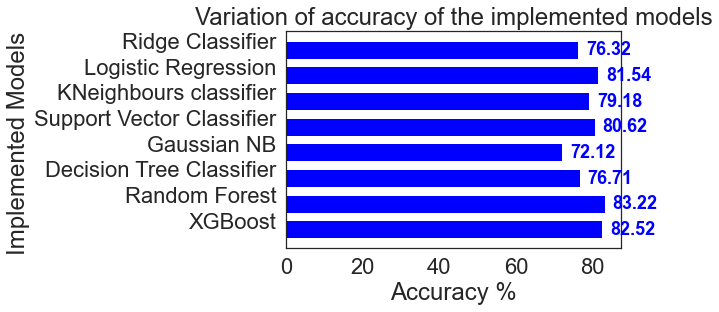

In [143]:
import os
import numpy as np
import matplotlib.pyplot as plt

x=tick_label
y=accarray

fig, ax = plt.subplots()
width = .7 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Variation of accuracy of the implemented models')
plt.xlabel('Accuracy %')
plt.ylabel('Implemented Models ')
#plt.show()

for i, v in enumerate(y):
    ax.text(v+2 , i-0.2, str(v), color='blue', fontweight='bold',size=18)
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

**We can clearly see that our top performing models are XGBoost, Random Forest and Support Vector Classifier**

**Accuracy metrics for TPOT Auto ML technioue and Neural Net**

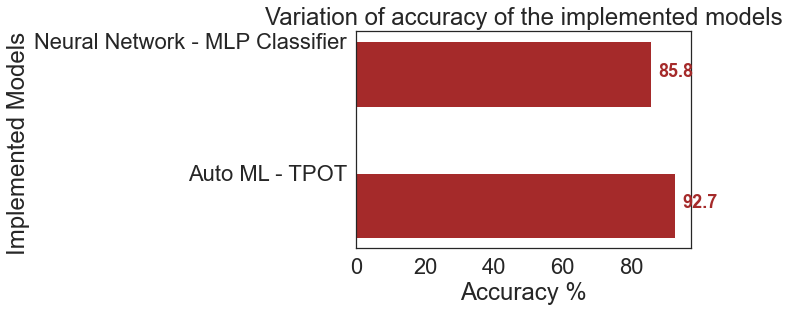

In [148]:
x=["Auto ML - TPOT" , "Neural Network - MLP Classifier"]
y=[92.70,85.80]

fig, ay = plt.subplots()    
width = .5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ay.barh(ind, y, width, color="brown")
ay.set_yticks(ind+width/2)
ay.set_yticklabels(x, minor=False)
plt.title('Variation of accuracy of the implemented models')
plt.xlabel('Accuracy %')
plt.ylabel('Implemented Models ')      
#plt.show()
for i, v in enumerate(y):
    ay.text(v + 2, i - 0.02, str(v), color='brown', fontweight='bold',size=18)
plt.savefig(os.path.join('test2.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

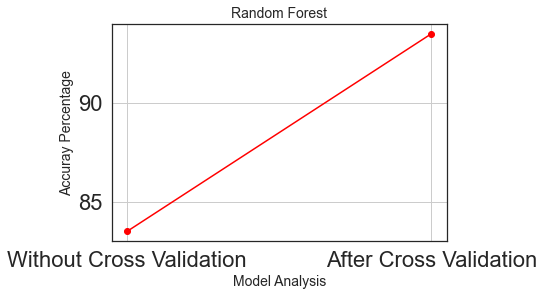

In [152]:
Label = ["Without Cross Validation","After Cross Validation"]
Accuracy_Rate = [83.5,93.5]
  
plt.plot(Label, Accuracy_Rate, color='red', marker='o')
plt.title('Random Forest', fontsize=14)
plt.xlabel('Model Analysis', fontsize=14)
plt.ylabel('Accuray Percentage', fontsize=14)
plt.grid(True)
plt.show()

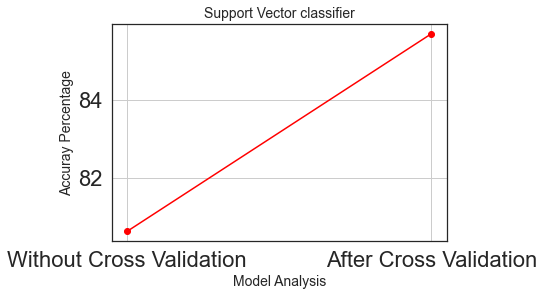

In [154]:
Label2 = ["Without Cross Validation","After Cross Validation"]
Accuracy_Rate2 = [80.62,85.70]
  
plt.plot(Label2, Accuracy_Rate2, color='red', marker='o')
plt.title('Support Vector classifier', fontsize=14)
plt.xlabel('Model Analysis', fontsize=14)
plt.ylabel('Accuray Percentage', fontsize=14)
plt.grid(True)
plt.show()

**Now comparing the accuracy obtained in the refered paper with our accuracy**

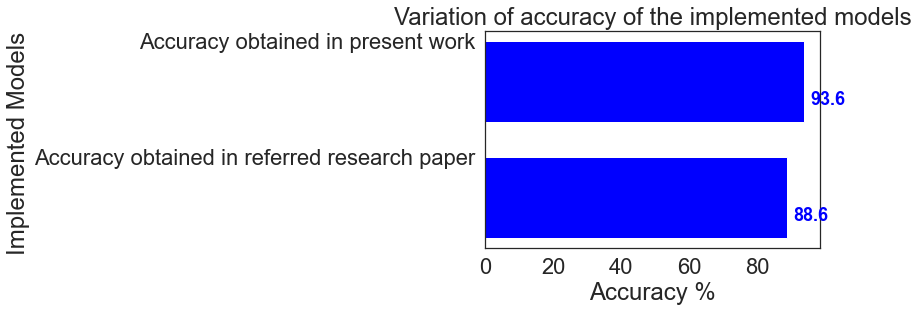

In [156]:
x=['Accuracy obtained in referred research paper', 'Accuracy obtained in present work']
y=[88.6,93.6]

fig, az = plt.subplots()
width = .7 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
az.barh(ind, y, width, color="blue")
az.set_yticks(ind+width/2)
az.set_yticklabels(x, minor=False)
plt.title('Variation of accuracy of the implemented models')
plt.xlabel('Accuracy %')
plt.ylabel('Implemented Models ')
#plt.show()

for i, v in enumerate(y):
    az.text(v+2 , i-0.2, str(v), color='blue', fontweight='bold',size=18)
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

**Final Conclusion and Recommendations**


The increasing popularity of online shopping has led to the emergence of new economic activities. To succeed in the highly competitive e-commerce environment, it is vital to understand consumer intention. Understanding what motivates consumer intention is critical because such intention is key to survival in this fast-paced and hypercompetitive environment. Where prior research has attempted at most a limited adaptation of the information system success model, we propose a comprehensive, empirical model that separates the ‘use’ construct into ‘intention to use’ and ‘actual use’. This makes it possible to test the importance of user intentions in determining their online shopping behaviour. Our results suggest that the consumer's intention to use is quite important, and accurately predicts the usage behaviour of consumers. In contrast, consumer satisfaction has a significant impact on intention to use but no direct causal relation with actual use. The significant importance of PageValue suggests that customers look at considerably different products and its recommendations. Hence a significant improvement on recommendation engines and bundle packages would bring in more conversions. Including more products exploiting the long tail effect in e-commerce will also bring in more revenue drivers.

After exploring and analyzing the various parameters of the data, recommendations are suggested which my help in alleviating the existing parameters.
Key factors and features which majorly influence the revenue generated have been brought to attention.
Machine Learning and AI models have been implemented and validated on 20% of the entire dataset which was randomly selected.
The best results were obtained for Random Forest Classifier after implementing 10-Fold Cross Validation which gave an accuracy 93.60% as compared to the previously worked upon results of 88.21%


**THANK YOU**